In [37]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Nigeria\Documents\AILead Machine Learning Class\data\Names.csv")
df

,John,Doe,120 jefferson st.,Riverside,NJ,8074,45000
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119,18000
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075,120000
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000
3,Chris,Blankman,NaN,SomeTown,SD,298,30000
4,"Joan ""Danger"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123,68000
5,Ben,Doe,120 jefferson st.,Riverside,NJ,8074,45000
6,Audrey,Oweimrin,220 hobo Av.,Phila,PA,9119,18000
7,Benson,Greene,120 Jefferson St.,Riverside,NJ,8075,120000
8,Stephen,Tybert,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000
9,Dan,Blankman,NaN,SomeTown,SD,298,30000


In [38]:
df.rename(columns = {'John': 'First_name', 'Doe': 'Last_name', '120 jefferson st.': 'Address', 'Riverside':'City', 'NJ':'State',
'8074':'Area_code', '45000': 'Income'}, inplace = True)
df

,First_name,Last_name,Address,City,NJ,Area_code,Income
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119,18000
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075,120000
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000
3,Chris,Blankman,NaN,SomeTown,SD,298,30000
4,"Joan ""Danger"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123,68000
5,Ben,Doe,120 jefferson st.,Riverside,NJ,8074,45000
6,Audrey,Oweimrin,220 hobo Av.,Phila,PA,9119,18000
7,Benson,Greene,120 Jefferson St.,Riverside,NJ,8075,120000
8,Stephen,Tybert,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000
9,Dan,Blankman,NaN,SomeTown,SD,298,30000


In [40]:
daf = df['Income']
import numpy as np
cond = [(df['Income'] <= 40000), (df['Income'] <= 80000)]
choices = [0.15, 0.2]
df['tax'] = np.select(cond, choices, default=0.25)
df

,First_name,Last_name,Address,City,NJ,Area_code,Income,tax
0,Jack,McGinnis,220 hobo Av.,Phila,PA,9119,18000,0.15
1,"John ""Da Man""",Repici,120 Jefferson St.,Riverside,NJ,8075,120000,0.25
2,Stephen,Tyler,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000,0.25
3,Chris,Blankman,NaN,SomeTown,SD,298,30000,0.15
4,"Joan ""Danger"", Anne",Jet,"9th, at Terrace plc",Desert City,CO,123,68000,0.20
5,Ben,Doe,120 jefferson st.,Riverside,NJ,8074,45000,0.20
6,Audrey,Oweimrin,220 hobo Av.,Phila,PA,9119,18000,0.15
7,Benson,Greene,120 Jefferson St.,Riverside,NJ,8075,120000,0.25
8,Stephen,Tybert,"7452 Terrace ""At the Plaza"" road",SomeTown,SD,91234,90000,0.25
9,Dan,Blankman,NaN,SomeTown,SD,298,30000,0.15


In [41]:
import pandas as pd
datf = pd.read_excel(r"C:\Users\Nigeria\Documents\AILead Machine Learning Class\data\shifts.xlsx")
datf

,Shift,Region,Sales Rep,Product,Cost per unit,Units Sold
0,1,South,Meggan,Paper,15,163
1,1,South,Charis,Stapler,25,108
2,1,South,Shayne,Pencil,5,118
3,1,North,Krystin,Pen,10,37
4,1,South,Leo,Paper,15,131
...,...,...,...,...,...,...
391,1,East,Diann,Binder,30,46
392,1,East,Cordell,Binder,30,91
393,1,North,Jesusita,Binder,30,200
394,1,South,Dina,Paper,15,166


In [83]:
reg_sum = pd.DataFrame(datf.groupby('Region')['Units Sold'].sum())
reg_sum = reg_sum.sort_values('Units Sold')
reg = reg_sum.sort_values('Units Sold').tail(1)
reg_sum

,Units Sold
Region,
West,11255
South,13752
East,14228
North,14675


In [50]:
sales = pd.DataFrame(datf.groupby('Sales Rep')['Units Sold'].sum())
sales.sort_values('Units Sold', ascending = False).head(3)

,Units Sold
Sales Rep,
Deandra,2915
Jesusita,2116
Natashia,2082


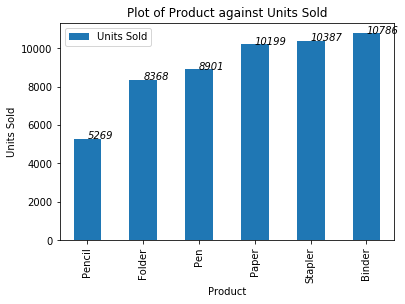

In [149]:
import matplotlib.pyplot as plt
pro_sum = pd.DataFrame(datf.groupby('Product')['Units Sold'].sum())
pros = pro_sum.sort_values('Units Sold')
pros.plot(kind = 'bar')
for pX, pY in enumerate(pros['Units Sold']):
    plt.annotate(pY, xy=(pX, pY), fontstyle='italic')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Plot of Product against Units Sold')
plt.show()

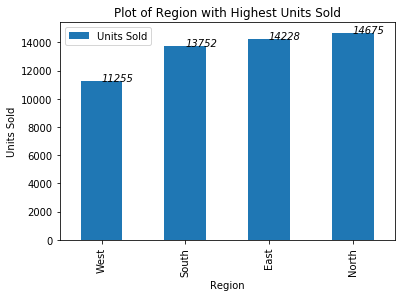

In [148]:
#plt.bar(reg_sum.index, reg_sum['Units Sold'])
reg_sum.plot(kind = 'bar')
for pX, pY in enumerate(reg_sum['Units Sold']):
    plt.annotate(pY, xy=(pX, pY), fontstyle='italic')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.title('Plot of Region with Highest Units Sold')
plt.show()

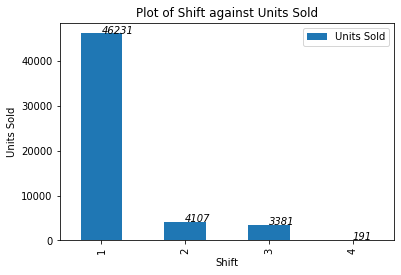

In [147]:
shifts = pd.DataFrame(datf.groupby('Shift')['Units Sold'].sum())
shifts = shifts.sort_values('Units Sold', ascending = False)
shifts.plot(kind = 'bar') #plt.bar(shifts.index, shifts['Units Sold'])
plt.xlabel('Shift')
plt.ylabel('Units Sold')
plt.title('Plot of Shift against Units Sold')
for pX, pY in enumerate(shifts['Units Sold']):
    plt.annotate(pY, xy=(pX, pY), fontstyle='italic')
plt.show()